In [1]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [68]:
# Merge dataframes
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


In [71]:
# Create the Urban, Suburban and Rural DataFrames.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [72]:
# type groups Total Rides
rides_by_type = pyber_data_df.groupby('type').count()[['ride_id']]
rides_by_type.columns = ['Total Rides']

rides_by_type.head().style.format("{:,.0f}")

,Total Rides
type,
Rural,125
Suburban,625
Urban,"1,625"


In [74]:
# type groups Total Drivers

drivers_by_type = pyber_data_df.groupby('type').sum()[['driver_count']]
drivers_by_type.columns = ['Total Drivers']

drivers_by_type.head().style.format("{:,.0f}")

,Total Drivers
type,
Rural,537
Suburban,"8,570"
Urban,"59,602"


In [10]:
# type groups Total Fares
pd.options.display.float_format = '${:,.2f}'.format

fares_by_type = pyber_data_df.groupby('type').sum()[['fare']]
fares_by_type.columns = ['Total Fares']

fares_by_type

,Total Fares
type,
Rural,"$4,327.93"
Suburban,"$19,356.33"
Urban,"$39,854.38"


In [11]:
# type groups Avg Fare per Ride
pd.options.display.float_format = '${:,.2f}'.format

fareavg_by_type = pyber_data_df.groupby('type').mean()[['fare']]
fareavg_by_type.columns = ['Average Fare per Ride']

fareavg_by_type

,Average Fare per Ride
type,
Rural,$34.62
Suburban,$30.97
Urban,$24.53


In [12]:
# Combine the data into a single dataset
#pyber_type_data_df = pd.merge(rides_by_type, drivers_by_type,on=["type"])

# Place the DataFrames side by side
pyber_type_data_df = pd.concat([rides_by_type, drivers_by_type,fares_by_type,fareavg_by_type], axis=1)

# Display the DataFrame
pyber_type_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride
type,,,,
Rural,125,537,"$4,327.93",$34.62
Suburban,625,8570,"$19,356.33",$30.97
Urban,1625,59602,"$39,854.38",$24.53


In [13]:
pyber_type_data_df['Average Fares Per Driver'] = pyber_type_data_df['Total Fares']/pyber_type_data_df['Total Drivers']

In [14]:
pyber_type_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fares Per Driver
type,,,,,
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [15]:
pyber_type_data_df.reset_index()

,type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fares Per Driver
0,Rural,125,537,"$4,327.93",$34.62,$8.06
1,Suburban,625,8570,"$19,356.33",$30.97,$2.26
2,Urban,1625,59602,"$39,854.38",$24.53,$0.67


In [16]:
#pyber_type_data_df.index.name = 'City Types'
#pyber_type_data_df

In [17]:
# Part 2 Challenge----------------------------------------------------------------------------------------
# Rename columns to {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}
multi_plot_df = pyber_data_df.rename(columns={'city': 'City', 'date': 'Date','fare': 'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
multi_plot_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


In [18]:
# set index to 'Date' column
multi_plot_df.set_index('Date')

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,$13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,$30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,$33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,$23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,$34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,$13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,$20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,$11.11,2781339863778,1,Rural


In [19]:
# Create a new DataFrame for fares and include only the Date, City Type, 
# and Fare columns using the copy() method on the merged DataFrame.
fares_df = multi_plot_df[['Date','City Type','Fare']].copy()
fares_df

,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,$13.83
1,2019-03-04 18:24:09,Urban,$30.24
2,2019-02-24 04:29:00,Urban,$33.44
3,2019-02-10 23:22:03,Urban,$23.44
4,2019-03-06 04:28:35,Urban,$34.58
...,...,...,...
2370,2019-04-29 17:04:39,Rural,$13.38
2371,2019-01-30 00:05:47,Rural,$20.76
2372,2019-02-10 21:03:50,Rural,$11.11
2373,2019-05-07 19:22:15,Rural,$44.94


In [20]:
# set index to 'Date' column
fares_df.set_index('Date')

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,$13.83
2019-03-04 18:24:09,Urban,$30.24
2019-02-24 04:29:00,Urban,$33.44
2019-02-10 23:22:03,Urban,$23.44
2019-03-06 04:28:35,Urban,$34.58
...,...,...
2019-04-29 17:04:39,Rural,$13.38
2019-01-30 00:05:47,Rural,$20.76
2019-02-10 21:03:50,Rural,$11.11


In [21]:
# Set the index to the datetime data type.
fares_df.index = pd.to_datetime(fares_df.index)


In [22]:
# Check the DataFrame using the info() method to make sure the index is a datetime data type.
fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000002374
Data columns (total 3 columns):
Date         2375 non-null object
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [23]:
# Calculate the sum() of fares by the type of city and date using groupby() to create a Series.
fares_by_type = fares_df.groupby(['City Type','Date']).sum()['Fare']
fares_by_type

City Type  Date               
Rural      2019-01-01 09:45:36   $43.69
           2019-01-02 11:18:32   $52.12
           2019-01-03 19:51:01   $19.90
           2019-01-04 03:31:26   $24.88
           2019-01-06 07:38:40   $47.33
                                  ...  
Urban      2019-05-08 04:20:00   $21.99
           2019-05-08 04:39:49   $18.45
           2019-05-08 07:29:01   $18.55
           2019-05-08 11:38:35   $19.77
           2019-05-08 13:10:18   $18.04
Name: Fare, Length: 2375, dtype: float64

In [24]:
# convert to dataframe and Reset the index
fares_by_type_df = fares_by_type.to_frame().reset_index()
fares_by_type_df

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,$43.69
1,Rural,2019-01-02 11:18:32,$52.12
2,Rural,2019-01-03 19:51:01,$19.90
3,Rural,2019-01-04 03:31:26,$24.88
4,Rural,2019-01-06 07:38:40,$47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,$21.99
2371,Urban,2019-05-08 04:39:49,$18.45
2372,Urban,2019-05-08 07:29:01,$18.55
2373,Urban,2019-05-08 11:38:35,$19.77


In [43]:
# Create a pivot table DataFrame
fare_pivot_table = pd.pivot_table(fares_by_type_df, values='Fare', index=['Date'],
                    columns=['City Type']#, aggfunc=np.sum
                                 )
fare_pivot_table

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,$nan,$nan,$37.91
2019-01-01 00:46:46,$nan,$47.74,$nan
2019-01-01 02:07:24,$nan,$24.07,$nan
2019-01-01 03:46:50,$nan,$nan,$7.57
2019-01-01 05:23:21,$nan,$nan,$10.75
...,...,...,...
2019-05-08 04:20:00,$nan,$nan,$21.99
2019-05-08 04:39:49,$nan,$nan,$18.45
2019-05-08 07:29:01,$nan,$nan,$18.55


In [44]:
# Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc
fare_pivot_loc = fare_pivot_table.loc['2019-01-01':'2019-04-28']
fare_pivot_loc

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,$nan,$nan,$37.91
2019-01-01 00:46:46,$nan,$47.74,$nan
2019-01-01 02:07:24,$nan,$24.07,$nan
2019-01-01 03:46:50,$nan,$nan,$7.57
2019-01-01 05:23:21,$nan,$nan,$10.75
...,...,...,...
2019-04-27 17:58:27,$14.01,$nan,$nan
2019-04-27 19:45:48,$nan,$28.84,$nan
2019-04-27 20:41:36,$nan,$nan,$8.28


In [48]:
# Create a new DataFrame by setting the DataFrame you created in Step 11 
# with resample() in weekly bins, and calculate the sum() of the fares for each week.


# Set the index to the datetime data type.
fare_pivot_loc.index = pd.to_datetime(fare_pivot_loc.index)

# Resampling the time series data based on weekly frequency 
# we apply it on stock open price 'W' indicates week 
weekly_resampled_data = fare_pivot_loc.resample('W').sum()
  
# find the mean opening price of each week  
# for each week over a period of 1 year. 
weekly_resampled_data 

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


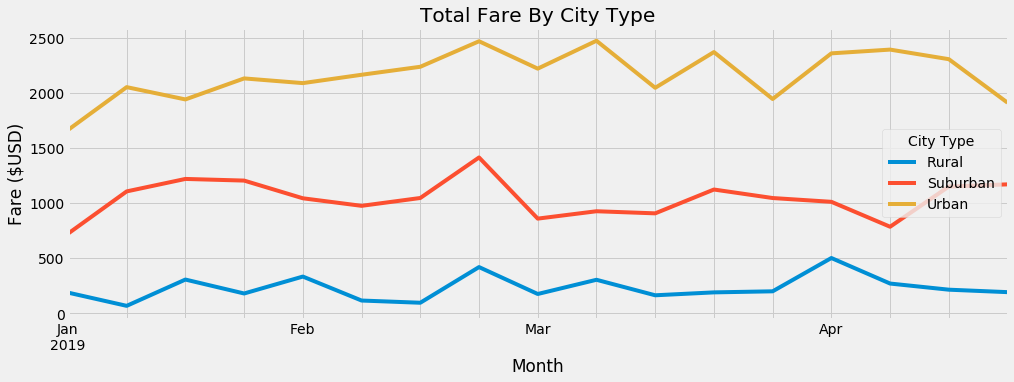

In [63]:
# Using the object-oriented interface method, 
# plot the DataFrame you created in Step 12 using the df.plot() function.
from matplotlib import style
style.use('fivethirtyeight')

ax = weekly_resampled_data.plot(xticks=weekly_resampled_data.index,figsize=(15,5))
# Add title and axis names
plt.title('Total Fare By City Type')
plt.xlabel('Month')
plt.ylabel('Fare ($USD)')
plt.savefig("analysis/Total_Fare_By_City_Type.png")
plt.show()
